# **Import Library**

In [12]:
!pip install google-play-scraper

# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas

import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi



import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca


!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

!pip install wordcloud
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download("omw-1.4")

from nltk.sentiment.vader import SentimentIntensityAnalyzer #Labelling
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from nltk.stem import PorterStemmer       # Stemm Word



from sklearn.feature_extraction.text import TfidfVectorizer   # TF-IDF
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.naive_bayes import BernoulliNB                   # Bernouli Library
from sklearn.ensemble import RandomForestClassifier           # Random Forest Model
from sklearn.linear_model import LogisticRegression           # Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier               # Decision Tree Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


!pip install tensorflow
import tensorflow as tf                                           # TensorFlow
from tensorflow.keras.preprocessing.text import Tokenizer         # Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # Adding Sequences to sequences


from sklearn.svm import SVC


# Other
import datetime as dt                     # Manipulasi data waktu dan tanggal
import csv                                # Save dataset to csv
import requests                           # https request
from io import StringIO                   # String IO



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# **Scraping Dataset**

In [13]:
# Mengambil semua ulasan dari aplikasi dengan ID 'com.byu.id' di Google Play Store.
# Proses scraping mungkin memerlukan beberapa saat tergantung pada jumlah ulasan yang ada.
scrapreview = reviews_all(
    'com.instagram.barcelona',          # ID aplikasi
    lang='en',             # Bahasa ulasan (default: 'en')
    country='us',          # Negara (default: 'us')
    sort=Sort.MOST_RELEVANT, # Urutan ulasan (default: Sort.MOST_RELEVANT)
    count=10000             # Jumlah maksimum ulasan yang ingin diambil
)

In [14]:
with open('ulasan_aplikasi.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])  # Menulis header kolom
    for review in scrapreview:
        writer.writerow([review['content']])  # Menulis konten ulasan ke dalam file CSV

# **Loading Dataset**

In [15]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(scrapreview)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

**Membuka file ulasan_aplikasi.csv**

In [16]:
# !pip install openpyxl
# import openpyxl #This imports the package after installation

# app_reviews_df = pd.read_excel('ulasan_aplikasi.xlsx')

In [17]:
app_reviews_df = pd.read_csv('ulasan_aplikasi.csv')
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [18]:
print(f"Jumlah Ulasan: {jumlah_ulasan}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Ulasan: 94289
Jumlah Kolom: 11


In [19]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,60389138-bf45-49f4-a9d6-b314314ff026,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Overall good, but has some issues it needs to ...",3,3617,346.0.0.40.110,2024-09-02 09:51:17,NaN,NaN,346.0.0.40.110
1,620009a1-7a1e-43e1-a598-9dd85d6fbfe6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,If I could give it 0 stars I would. It may be ...,1,7387,361.3.0.53.106,2025-01-05 04:17:42,NaN,NaN,361.3.0.53.106
2,51ffd774-38ee-4f10-bd61-0904bca33a3a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Enjoy the easy of communicating with a timelin...,5,12356,359.2.0.67.109,2024-12-07 15:05:50,NaN,NaN,359.2.0.67.109
3,cd28d687-d3ce-417a-a2d6-f62e91e4176b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It needs some improvements. It's gotten a litt...,4,4859,319.0.0.37.109,2024-02-22 18:00:42,NaN,NaN,319.0.0.37.109
4,990f1968-5a6a-41fe-9537-1a33808c4ac6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very frustrating experience. Feed it's full of...,2,441,289.0.0.77.109,2023-07-08 01:23:40,NaN,NaN,289.0.0.77.109


In [20]:
# kita hanya mengambil kolom content saja
# Menghapus kolom yang tidak diinginkan
columns_to_drop = ['reviewId', 'userName', 'userImage', 'score',
                    'thumbsUpCount', 'reviewCreatedVersion',
                    'at', 'replyContent', 'repliedAt', 'appVersion']

app_reviews_df = app_reviews_df.drop(columns=columns_to_drop)

In [21]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94289 entries, 0 to 94288
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  94278 non-null  object
dtypes: object(1)
memory usage: 736.8+ KB


In [22]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [23]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [24]:
print(f"Jumlah Ulasan Setelah Hapus Duplikat: {jumlah_ulasan_setelah_hapus_duplikat}")
print(f"Jumlah Kolom: {jumlah_kolom_setelah_hapus_duplikat}")

Jumlah Ulasan Setelah Hapus Duplikat: 64283
Jumlah Kolom: 1


# **Preprocessing Text**

In [25]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text


def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('english'))
    # listStopwords.update(listStopwords1)
    # listStopwords.update(stopwords_list)
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def lemmatizerText(text): # Mengubah kata menjadi bentuk dasar atau kata dasar yang sesuai
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_words



def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    # words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in text]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

#**Membuat fungsi Slangwords**

In [26]:
# URL dari file slang.txt
url = "https://raw.githubusercontent.com/Ashpex/Slang-Word/master/slang.txt"

# Mengunduh konten dari URL
response = requests.get(url)

# Memeriksa apakah permintaan berhasil
if response.status_code == 200:
    # Memisahkan konten berdasarkan baris
    slang_lines = response.text.splitlines()

    # Membuat kamus untuk menyimpan kata slang dan padanannya
    slang_dict = {}

    for line in slang_lines:
        # Memisahkan kata slang dan padanannya
        parts = line.split('`')
        if len(parts) == 2:
            slang_word = parts[0].strip()  # Kata slang
            meaning = parts[1].strip()      # Padanannya
            slang_dict[slang_word] = meaning

    # Menampilkan kamus
    print(slang_dict)
else:
    print("Gagal mengunduh file, status code:", response.status_code)

{'BBC': 'British Broadcasting Corporation', 'BBB': 'Bugging Beyond Belief', 'BBE': 'Babe', 'GLOTR': 'Good Luck On The Rebuild', 'TWSS': "That's What She Said", 'BBG': 'Best Be Going', 'BBK': 'Boy Better Know', 'TFRM': 'Thanks For Reminding Me', 'BBM': 'Blackberry Messaging', 'BBL': 'Be Back Later', 'BBO': 'Being Bored Online', 'BBN': 'Be Back Never', 'BBQ': 'Barbecue| Better Be Quick', '10-4': 'Understood, OK', 'SDA': 'Seventh-Day Adventist', 'BBS': 'Be Back Soon| Bulletin Board System', 'U.O.E.N.O': "You Don't Even Know", 'YEAP': 'Yes', '10-2': "Radio code for 'Receiving well'", 'BBR': 'Blonde, Brunette, Redhead', '10-1': "Radio code for 'Receiving poorly'", 'BBT': 'Be Back Tomorrow', 'BBW': 'Big Beautiful Woman', 'BBV': 'Brags Beats and Variance', 'BBY': 'Baby', 'BBZ': 'Babes', 'SDK': 'Software Development Kit', 'BCD': 'Behind Closed Doors', 'BCC': 'Blind Carbon Copy', '$': 'Dollar| money', 'BCF': 'Best Cousin Forever', 'BCE': 'Before Common Era', '&': 'And', 'BCG': 'Birth Control Gl

In [27]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slang_dict:
            fixed_words.append(slang_dict[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [28]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Mnegubah kata kedalam bentuk dasarnya dan menyimpannya di 'lemmatizerText'
clean_df['text_lemmatizer'] = clean_df['text_stopword'].apply(lemmatizerText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_lemmatizer'].apply(toSentence)

In [29]:
clean_df

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatizer,text_akhir
0,"Overall good, but has some issues it needs to ...",Overall good but has some issues it needs to w...,overall good but has some issues it needs to w...,overall good but has some issues it needs to w...,"[overall, good, but, has, some, issues, it, ne...","[overall, good, issues, needs, work, instance,...","[overall, good, issue, need, work, instance, c...",overall good issue need work instance click po...
1,If I could give it 0 stars I would. It may be ...,If I could give it stars I would It may be th...,if i could give it stars i would it may be th...,if i could give it stars i would it may be the...,"[if, i, could, give, it, stars, i, would, it, ...","[could, give, stars, would, may, least, intuit...","[could, give, star, would, may, least, intuiti...",could give star would may least intuitive app ...
2,Enjoy the easy of communicating with a timelin...,Enjoy the easy of communicating with a timelin...,enjoy the easy of communicating with a timelin...,enjoy the easy of communicating with a timelin...,"[enjoy, the, easy, of, communicating, with, a,...","[enjoy, easy, communicating, timeline, copy, p...","[enjoy, easy, communicating, timeline, copy, p...",enjoy easy communicating timeline copy paste t...
3,It needs some improvements. It's gotten a litt...,It needs some improvements Its gotten a little...,it needs some improvements its gotten a little...,it needs some improvements its gotten a little...,"[it, needs, some, improvements, its, gotten, a...","[needs, improvements, gotten, little, better, ...","[need, improvement, gotten, little, better, pa...",need improvement gotten little better past wee...
4,Very frustrating experience. Feed it's full of...,Very frustrating experience Feed its full of u...,very frustrating experience feed its full of u...,very frustrating experience feed its full of u...,"[very, frustrating, experience, feed, its, ful...","[frustrating, experience, feed, full, users, d...","[frustrating, experience, feed, full, user, do...",frustrating experience feed full user dont fol...
...,...,...,...,...,...,...,...,...
94275,🎉️,,,,[],[],[],
94276,Where is ........,Where is,where is,where is,"[where, is]",[],[],
94277,👋 👋,,,,[],[],[],
94278,Wow❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤...,Wow,wow,wow,[wow],[wow],[wow],wow


# **Pelabelan**

In [30]:
analyzer = SentimentIntensityAnalyzer()
clean_df['sentiment_scores'] = clean_df['text_akhir'].apply(lambda x: analyzer.polarity_scores(x))

untuk pelabelan saya menggunakan vader_lexicon, karna dirancang khusus untuk menganalisis sentiment yang menggunakan bahasa informal. dimana kita mengetahui bahwa data yang saya ambil adalah ulasan dari aplikasi instagram yang biasanya menggunakan bahasa informal. Kenapa saya menggunakan score positif > 0,05, negatif < -0,05 dan neutral antara - 0,05 dan 0,05 karna Skor mendekati nol (antara -0.05 dan 0.05) dianggap netral karena tidak menunjukkan polaritas yang kuat.

Referensi: https://github.com/cjhutto/vaderSentiment

In [31]:
# Menentukan label berdasarkan skor komposit
def label_sentiment(score):
    if score > 0.05:  # Ambang batas untuk positif
        return 'positive'
    elif score < -0.05:  # Ambang batas untuk negatif
        return 'negative'
    else:
        return 'neutral'

# Menerapkan fungsi pelabelan
clean_df['label'] = clean_df['sentiment_scores'].apply(lambda x: label_sentiment(x['compound']))
clean_df

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatizer,text_akhir,sentiment_scores,label
0,"Overall good, but has some issues it needs to ...",Overall good but has some issues it needs to w...,overall good but has some issues it needs to w...,overall good but has some issues it needs to w...,"[overall, good, but, has, some, issues, it, ne...","[overall, good, issues, needs, work, instance,...","[overall, good, issue, need, work, instance, c...",overall good issue need work instance click po...,"{'neg': 0.12, 'neu': 0.696, 'pos': 0.184, 'com...",positive
1,If I could give it 0 stars I would. It may be ...,If I could give it stars I would It may be th...,if i could give it stars i would it may be th...,if i could give it stars i would it may be the...,"[if, i, could, give, it, stars, i, would, it, ...","[could, give, stars, would, may, least, intuit...","[could, give, star, would, may, least, intuiti...",could give star would may least intuitive app ...,"{'neg': 0.187, 'neu': 0.563, 'pos': 0.25, 'com...",positive
2,Enjoy the easy of communicating with a timelin...,Enjoy the easy of communicating with a timelin...,enjoy the easy of communicating with a timelin...,enjoy the easy of communicating with a timelin...,"[enjoy, the, easy, of, communicating, with, a,...","[enjoy, easy, communicating, timeline, copy, p...","[enjoy, easy, communicating, timeline, copy, p...",enjoy easy communicating timeline copy paste t...,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",positive
3,It needs some improvements. It's gotten a litt...,It needs some improvements Its gotten a little...,it needs some improvements its gotten a little...,it needs some improvements its gotten a little...,"[it, needs, some, improvements, its, gotten, a...","[needs, improvements, gotten, little, better, ...","[need, improvement, gotten, little, better, pa...",need improvement gotten little better past wee...,"{'neg': 0.128, 'neu': 0.74, 'pos': 0.133, 'com...",positive
4,Very frustrating experience. Feed it's full of...,Very frustrating experience Feed its full of u...,very frustrating experience feed its full of u...,very frustrating experience feed its full of u...,"[very, frustrating, experience, feed, its, ful...","[frustrating, experience, feed, full, users, d...","[frustrating, experience, feed, full, user, do...",frustrating experience feed full user dont fol...,"{'neg': 0.074, 'neu': 0.787, 'pos': 0.14, 'com...",positive
...,...,...,...,...,...,...,...,...,...,...
94275,🎉️,,,,[],[],[],,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",neutral
94276,Where is ........,Where is,where is,where is,"[where, is]",[],[],,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",neutral
94277,👋 👋,,,,[],[],[],,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",neutral
94278,Wow❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤...,Wow,wow,wow,[wow],[wow],[wow],wow,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",positive


In [32]:
print(clean_df['label'].value_counts())

label
positive    28859
neutral     24393
negative    11031
Name: count, dtype: int64


**# Membuat Visulisasi**

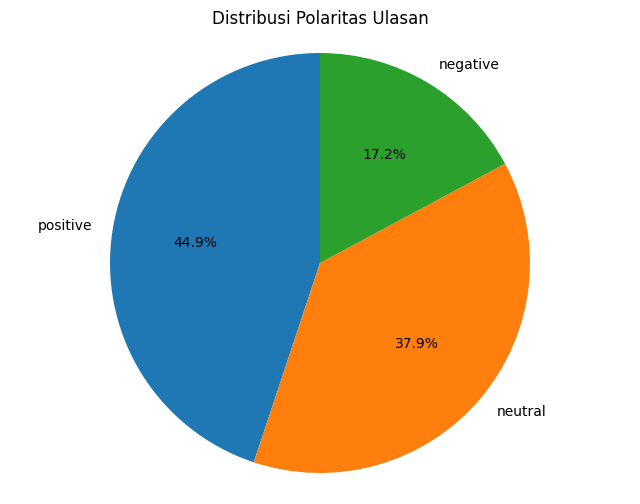

In [33]:
jumlah_polarity = clean_df['label'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(jumlah_polarity, labels=jumlah_polarity.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Polaritas Ulasan')
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

**Analisis sentimen ulasan aplikasi Threads dari pengguna di Amerika Serikat (US) menunjukkan distribusi yang menarik:**

1. 44,9% ulasan positif:
- Ini mengindikasikan bahwa hampir setengah dari pengguna di AS memiliki pengalaman yang baik dengan aplikasi Threads.
- Kemungkinan, fitur-fitur yang ditawarkan aplikasi, antarmuka pengguna, atau kinerja aplikasi secara umum diterima dengan baik oleh pengguna di negara tersebut.
2. 17,2% ulasan negatif:
- Meskipun mayoritas positif, masih ada sebagian signifikan pengguna yang memiliki keluhan atau pengalaman negatif.
- Ulasan negatif ini perlu diperhatikan karena dapat memberikan wawasan tentang area-area yang perlu ditingkatkan oleh pengembang aplikasi.
- Kemungkinan terdapat beberapa permasalahan teknis, ataupun fitur yang kurang disukai oleh pengguna US.
3. 37,9% ulasan netral:
- Persentase yang cukup besar ini menunjukkan bahwa banyak pengguna di AS memiliki pandangan yang tidak terlalu positif atau negatif terhadap aplikasi Threads.
- Ulasan netral bisa mencakup komentar tentang fitur yang "biasa saja" atau pengalaman penggunaan yang tidak meninggalkan kesan mendalam.
- Ulasan netral juga dapat diartikan bahwa pengguna masih dalam tahap mencoba aplikasi.

**Implikasi dan Analisis Lebih Lanjut:**

1. Dominasi ulasan positif menunjukkan potensi pertumbuhan yang baik untuk aplikasi Threads di pasar AS.
2. Namun, pengembang perlu memperhatikan ulasan negatif untuk mengidentifikasi dan mengatasi masalah yang dihadapi pengguna.
3. Ulasan netral juga penting karena dapat memberikan peluang untuk meningkatkan pengalaman pengguna dan mengubah pandangan mereka menjadi positif.
4. Analisis lebih lanjut dapat dilakukan dengan melihat isi dari setiap ulasan. Dengan begitu, kita bisa mendapatkan informasi yang lebih detail tentang, fitur apa yang disukai, dan fitur apa yang tidak disukai oleh pengguna.

Secara keseluruhan, meskipun aplikasi Threads menunjukkan kinerja yang cukup baik di AS, ada ruang untuk perbaikan. Dengan memahami dan menanggapi umpan balik pengguna, pengembang dapat meningkatkan kepuasan pengguna dan memperkuat posisi aplikasi di pasar.

# **Eksplorasi Label**

In [34]:
positive = clean_df[clean_df['label'] == 'positive']
negative = clean_df[clean_df['label'] == 'negative']
neutral = clean_df[clean_df['label'] == 'neutral']

## **WordCloud Secera General**

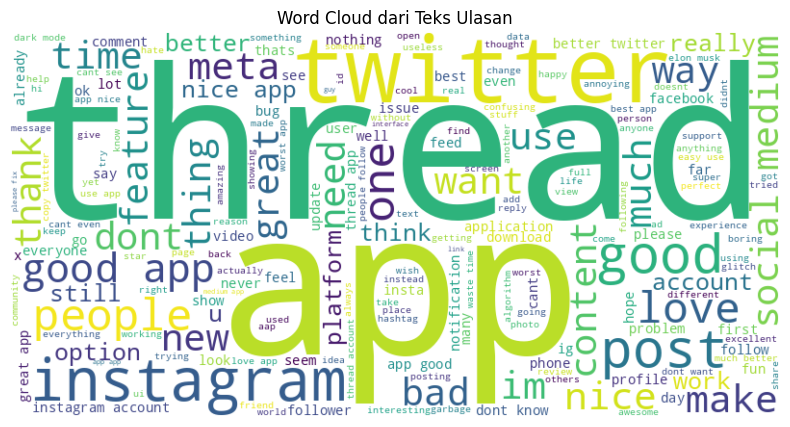

In [35]:
# Menggabungkan semua teks dalam kolom 'text_lemmatizer'
# Ubah list menjadi string sebelum digabungkan
all_text = ' '.join([' '.join(text) if isinstance(text, list) else str(text) for text in clean_df['text_lemmatizer']])


# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan sumbu
plt.title('Word Cloud dari Teks Ulasan')
plt.show()
# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


## **WordCloud Secera Positif**

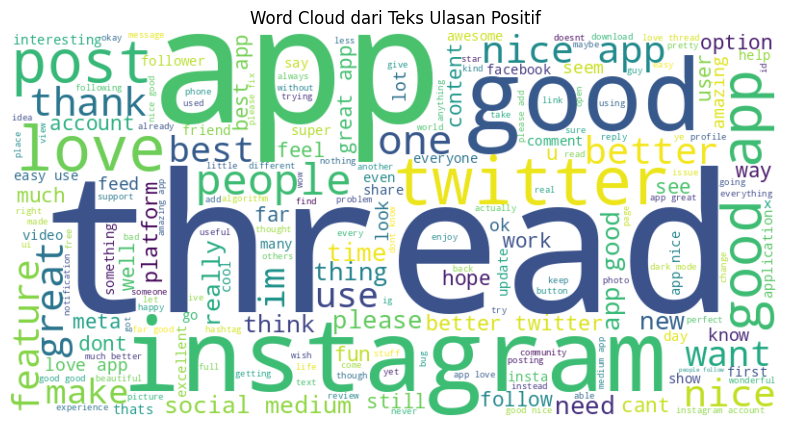

In [36]:
# Menggabungkan semua teks dalam kolom 'text_stopword'
# Ubah list menjadi string sebelum digabungkan
all_text = ' '.join([' '.join(text) if isinstance(text, list) else str(text) for text in positive['text_lemmatizer']])


# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan sumbu
plt.title('Word Cloud dari Teks Ulasan Positif')
plt.show()
# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


## **WordCloud Secera Negatif**




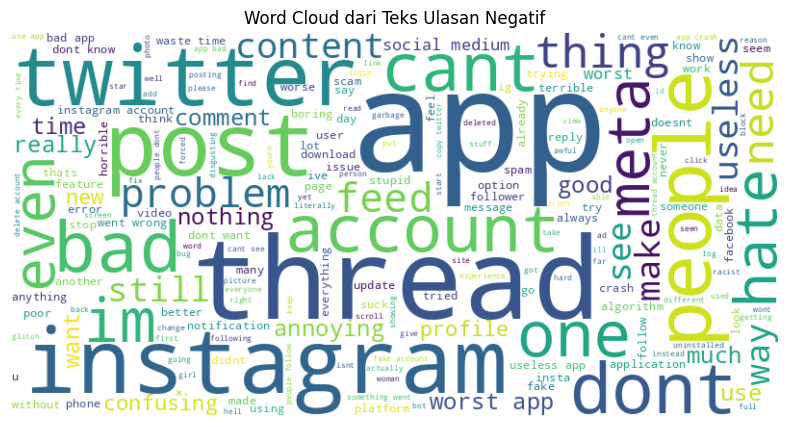

In [37]:
# Menggabungkan semua teks dalam kolom 'text_lemmatizer'
# Ubah list menjadi string sebelum digabungkan
all_text = ' '.join([' '.join(text) if isinstance(text, list) else str(text) for text in negative['text_lemmatizer']])


# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menyembunyikan sumbu
plt.title('Word Cloud dari Teks Ulasan Negatif')
plt.show()
# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


# **TF-IDF, Spliing Rasio Rasio 80/20 dan Algoritma SVM**

In [38]:
clean_df['label'] = clean_df['label'].map({'negative': 0, 'neutral': 1, 'positive': 2}).astype(int)

In [39]:
clean_df.head()

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatizer,text_akhir,sentiment_scores,label
0,"Overall good, but has some issues it needs to ...",Overall good but has some issues it needs to w...,overall good but has some issues it needs to w...,overall good but has some issues it needs to w...,"[overall, good, but, has, some, issues, it, ne...","[overall, good, issues, needs, work, instance,...","[overall, good, issue, need, work, instance, c...",overall good issue need work instance click po...,"{'neg': 0.12, 'neu': 0.696, 'pos': 0.184, 'com...",2
1,If I could give it 0 stars I would. It may be ...,If I could give it stars I would It may be th...,if i could give it stars i would it may be th...,if i could give it stars i would it may be the...,"[if, i, could, give, it, stars, i, would, it, ...","[could, give, stars, would, may, least, intuit...","[could, give, star, would, may, least, intuiti...",could give star would may least intuitive app ...,"{'neg': 0.187, 'neu': 0.563, 'pos': 0.25, 'com...",2
2,Enjoy the easy of communicating with a timelin...,Enjoy the easy of communicating with a timelin...,enjoy the easy of communicating with a timelin...,enjoy the easy of communicating with a timelin...,"[enjoy, the, easy, of, communicating, with, a,...","[enjoy, easy, communicating, timeline, copy, p...","[enjoy, easy, communicating, timeline, copy, p...",enjoy easy communicating timeline copy paste t...,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",2
3,It needs some improvements. It's gotten a litt...,It needs some improvements Its gotten a little...,it needs some improvements its gotten a little...,it needs some improvements its gotten a little...,"[it, needs, some, improvements, its, gotten, a...","[needs, improvements, gotten, little, better, ...","[need, improvement, gotten, little, better, pa...",need improvement gotten little better past wee...,"{'neg': 0.128, 'neu': 0.74, 'pos': 0.133, 'com...",2
4,Very frustrating experience. Feed it's full of...,Very frustrating experience Feed its full of u...,very frustrating experience feed its full of u...,very frustrating experience feed its full of u...,"[very, frustrating, experience, feed, its, ful...","[frustrating, experience, feed, full, users, d...","[frustrating, experience, feed, full, user, do...",frustrating experience feed full user dont fol...,"{'neg': 0.074, 'neu': 0.787, 'pos': 0.14, 'com...",2


In [40]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['label']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

**Menggunakan SVM**

referensi: https://colab.research.google.com/github/corinnaabigail/sentiment-analysis-python-with-support-vector-machine/blob/master/Sentiment%20Analysis%20with%20Python.ipynb#scrollTo=S6q20rMZyAZh

In [41]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

predictions_SVM = model.predict(X_test)
SVM_accuracy = accuracy_score(predictions_SVM, y_test)*100
SVM_accuracy = round(SVM_accuracy,1)

In [42]:
SVM_accuracy

92.3

In [43]:
print ("\nHere is the classification report:")
print (classification_report(y_test, predictions_SVM))


Here is the classification report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2237
           1       0.91      0.97      0.94      4896
           2       0.94      0.92      0.93      5724

    accuracy                           0.92     12857
   macro avg       0.91      0.90      0.91     12857
weighted avg       0.92      0.92      0.92     12857



In [57]:
# Example negative review text for testing
negative_review = "This app is terrible. It crashes constantly and the interface is awful."

# Preprocess the new review (mimicking the preprocessing steps)
# ... (apply cleaningText, casefoldingText, fix_slangwords, tokenizingText, filteringText, lemmatizerText, toSentence)

# Create a DataFrame for the new review
new_review_df = pd.DataFrame({'text_akhir': [negative_review]})

# Transform the new review using the existing TF-IDF vectorizer
new_review_tfidf = tfidf.transform(new_review_df['text_akhir'])

# Predict the sentiment of the new review
predicted_sentiment = model.predict(new_review_tfidf)

# Print the prediction (0 for negative, 1 for neutral, 2 for positive)
print(f"Predicted sentiment: {predicted_sentiment[0]}")

# Map the numerical label back to its string representation
sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
predicted_sentiment_label = sentiment_mapping.get(predicted_sentiment[0])
print(f"Predicted sentiment label: {predicted_sentiment_label}")


Predicted sentiment: 0
Predicted sentiment label: negative


# **TF-IDF, SPliting Rasio (70/30)  dan Modelling dengan Random Forest**

Referensi : https://gist.github.com/pb111/88545fa33780928694388779af23bf58

In [44]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['label']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.30, random_state=42)



# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

# Predict the Test set results

y_pred = clf.predict(X_test)

In [45]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 100 decision-trees : 0.8906


In [46]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.69      0.78      3341
           1       0.90      0.95      0.92      7317
           2       0.89      0.92      0.90      8627

    accuracy                           0.89     19285
   macro avg       0.89      0.85      0.87     19285
weighted avg       0.89      0.89      0.89     19285



In [61]:
# Craft a review with intentionally neutral language
neutral_review = "The app performs its basic functions."

# Preprocess the new review using the same steps as during training
new_review_cleaned = cleaningText(neutral_review)
new_review_casefolded = casefoldingText(new_review_cleaned)
new_review_slang = fix_slangwords(new_review_casefolded)
new_review_tokenized = tokenizingText(new_review_slang)
new_review_filtered = filteringText(new_review_tokenized)
new_review_lemmatized = lemmatizerText(new_review_filtered)
new_review_final = toSentence(new_review_lemmatized)

# Create a DataFrame for the new review
new_review_df = pd.DataFrame({'text_akhir': [new_review_final]})

# Transform the new review using the existing TF-IDF vectorizer
new_review_tfidf = tfidf.transform(new_review_df['text_akhir'])

# Predict the sentiment using the RandomForestClassifier
predicted_sentiment = clf.predict(new_review_tfidf)

# Print the prediction
print(f"Predicted sentiment: {predicted_sentiment[0]}")  # Expected output: 1 (neutral)

# Map the numerical label back to its string representation
sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
predicted_sentiment_label = sentiment_mapping.get(predicted_sentiment[0])
print(f"Predicted sentiment label: {predicted_sentiment_label}")  # Expected output: neutral

Predicted sentiment: 1
Predicted sentiment label: neutral


# **Deep Learning LTSM**

In [47]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']

num_classes = 3
y = clean_df['label']
y_onehot = tf.keras.utils.to_categorical(y, num_classes)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=25)

In [48]:
vocab_size = 10000  # Maximum vocab saved as token
max_length = 50    # Max word in a sequence
trunc_type='post'   #
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(y_train)
testing_labels = np.array(y_test)

In [49]:
# Parameters
embedding_dim = 16
filters = 32
dense_dim = 6

# Model Definition with Conv1D
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(filters),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Set the training parameters
model_lstm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
num_epochs = 20
batch_size = 32
# Train the model
model_history = model_lstm.fit(training_padded, training_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(testing_padded, testing_labels))

Epoch 1/20
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.4778 - loss: 0.9995 - val_accuracy: 0.5439 - val_loss: 0.9322
Epoch 2/20
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5385 - loss: 0.9324 - val_accuracy: 0.5158 - val_loss: 0.9405
Epoch 3/20
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5204 - loss: 0.9335 - val_accuracy: 0.5179 - val_loss: 0.9417
Epoch 4/20
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5145 - loss: 0.9473 - val_accuracy: 0.5610 - val_loss: 0.9258
Epoch 5/20
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5689 - loss: 0.9164 - val_accuracy: 0.5732 - val_loss: 0.9171
Epoch 6/20
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.5043 - loss: 0.9441 - val_accuracy: 0.5053 - val_loss: 0.9485
Epoch 7/20
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5178 - loss: 0.9372 - val_accuracy: 0.5396 - val_loss: 0.9312
Epoch 8/20
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5837 -

In [51]:
model_lstm.evaluate(testing_padded, testing_labels)

402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9465 - loss: 0.2160


[0.20534363389015198, 0.9482771754264832]

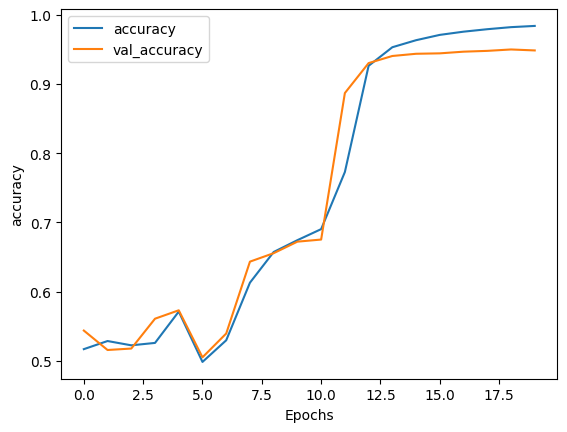

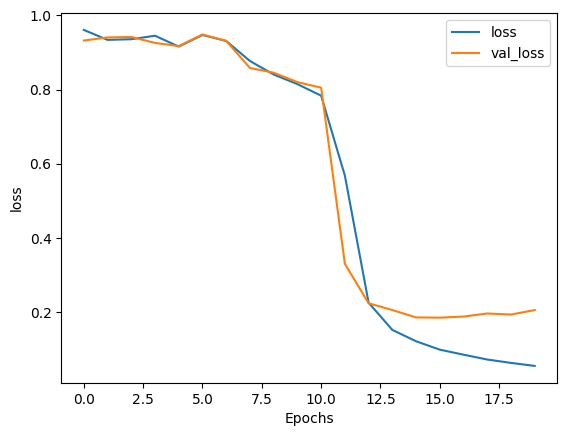

In [52]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(model_history, 'accuracy')
plot_graphs(model_history, 'loss')

# **Pengujian LSTM**

In [55]:
# Example positive review about Threads
new_review = "Threads is an amazing app! I love how easy it is to use and how quickly I can share updates with my friends. It's much better than other platforms. Highly recommend!"


# Preprocess the new review (using the same preprocessing steps as before)
new_review_cleaned = cleaningText(new_review)
new_review_casefolded = casefoldingText(new_review_cleaned)
new_review_slang = fix_slangwords(new_review_casefolded) # make sure fix_slangwords is defined
new_review_tokenized = tokenizingText(new_review_slang)
new_review_filtered = filteringText(new_review_tokenized)
new_review_lemmatized = lemmatizerText(new_review_filtered)
new_review_final = toSentence(new_review_lemmatized)

# Tokenize and pad the new review
new_review_sequence = tokenizer.texts_to_sequences([new_review_final])
new_review_padded = pad_sequences(new_review_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Predict the sentiment
prediction = model_lstm.predict(new_review_padded)
predicted_class = np.argmax(prediction)

# Print the prediction
print(f"Predicted Sentiment: {predicted_class}") # 0: Negative, 1: Neutral, 2: Positive

# You can improve this by adding a mapping from predicted class to sentiment label
sentiment_labels = ["Negative", "Neutral", "Positive"]
predicted_sentiment_label = sentiment_labels[predicted_class]
print(f"Predicted Sentiment Label: {predicted_sentiment_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Sentiment: 2
Predicted Sentiment Label: Positive


# **Membuat file requirements.txt**

In [53]:
 !pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
astunparse==1.6.3
attrs==25.3.0
audioread==3.0.1
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bleach==6.2.0
blinker==1.4
blis==1.2.1
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
charset-normalizer==3.4.1
chex==0.1.89
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
confection==0.1.5
contourpy==1.3.1
cryptography==3.4.8
cycler==0.12.1
cymem==2.0.11
dbus-python==1.2.18
debugpy==1.8.0
decorator==5.2.1
defusedxml==0.7.1
distrax==0.1.5
distro==1.7.0
dm-tree==0.1.9
docstring_parser==0.16
einops==0.8.1
en_core_web_sm @ https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl#sha256=1932429db727d4bff3deed6b34cfc05df17794f4a52eeb26cf8928f7c1a0fb85
entrypoints==0.4
et_xmlfile==2.0.0
etil